In [5]:
#Setting up the environement
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Dummy pandas dataframe
#Setting up time in minutes
start = 0
end = 480
def minute_range(start, end, step=15):
    cur = start
    time_list = [cur]
    while cur < end:
        cur = cur+step
        time_list.append(cur)
    return time_list
        

#numoy array
max = 50
time_list = minute_range(start,end,15)
x = np.linspace(0,m.pi*50,len(time_list))
y = np.array([m.sin(i/50)*max for i in x])
time = time_list

df = pd.DataFrame({'time':time_list})

def eight_row_sin(lst, df, max_, min_, sd,x):
    max_ = np.random.uniform(min_,max_, 1)
    def change_to_zero(x):
        if x<0:
            return 0
        else:
            return x
    
    
    for i in lst:
        df[i]  = np.array([m.sin(i/50)*max_ for i in x])
        df[i] = df[i].apply(lambda x: int(np.random.uniform(x - sd, x + sd, 1)))
        df[i] = df[i].apply(change_to_zero)
    return df


Day_Leg = ['1North', '1South', '1East', '1West', '2North', '2South', '2East', '2West','3North', '3South', '3East', '3West']
df = eight_row_sin(lst=Day_Leg, df=df, max_=200, min_=150, sd = 30, x=x)



# for i in Day_Leg:
#     fig,ax = plt.subplots()
#     print(i)
#     ax.scatter(df.x,df[i])
#     ax.set(xlabel = 'Time (Minutes)', ylabel = 'Demand')
#     plt.show()

In [6]:

df

,time,1North,1South,1East,1West,2North,2South,2East,2West,3North,3South,3East,3West
0,0,0,0,9,0,2,8,25,0,0,0,23,19
1,15,0,2,0,31,29,0,39,31,4,21,1,20
2,30,38,46,49,31,7,14,54,36,1,31,37,25
3,45,47,27,70,36,31,63,66,53,28,61,40,29
4,60,34,56,58,60,86,29,45,80,62,30,72,72
5,75,45,78,59,71,99,66,95,60,56,53,90,72
6,90,77,78,68,88,65,54,105,54,86,58,91,56
7,105,96,112,125,93,83,79,114,121,125,106,121,103
8,120,79,135,99,93,91,81,104,100,103,78,92,85
9,135,113,110,113,142,93,88,132,101,107,117,142,127


# rou.xml format
with open("data/cross.rou.xml", "w") as routes:
        print("""<routes>
        <vType id="typeWE" accel="0.8" decel="4.5" sigma="0.5" length="5" minGap="2.5" maxSpeed="16.67" \
guiShape="passenger"/>
        <vType id="typeNS" accel="0.8" decel="4.5" sigma="0.5" length="7" minGap="3" maxSpeed="25" guiShape="bus"/>

        <route id="right" edges="51o 1i 2o 52i" />
        <route id="left" edges="52o 2i 1o 51i" />
        <route id="down" edges="54o 4i 3o 53i" />""", f)


# trip generation format
    <routes xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/routes_file.xsd">
        <vType id="veh_passenger" vClass="passenger"/>
        <trip id="veh0" type="veh_passenger" depart="0.00" departLane="best" from="31313667#2" to="-153698390#1"/>
        <trip id="veh2" type="veh_passenger" depart="11.98" departLane="best" from="415280722" to="35269774#0"/>
    </routes>

In [164]:
import random as rd



def to_route(beginning,possible_route):
    """ 
    Returns end route depending on probability dictionary similar below
    
    possible_route = {
    
    "North":{
        "South": 40, 
        "East": 60
        },
    "South":{
        "North": 75, 
        "West": 25
        },
    "East":{
        "West": 70,
        "North": 30
        },
    "West":{
        "East": 55,
        "South": 45
        }
}
    """
    
    direction = list(possible_route[beginning].keys())                 #creates list of keys per possible route, ex. keys of "North" is "South" and "East"
    values = list(possible_route[beginning].values())                  #creates list of values per possible route, ex. values of "North" is 40 and 60
    
    end = rd.choices(direction, weights=values, k=1)                   #to use rd.choices, lists must be assigned, not objects
    
    return end

to_route("North",possible_route)                                       #provide beginning, possible_route serves as a dictionary for the whole function.


['South']

In [ ]:

possible_route = {

"North":{
    "South": 40, 
    "East": 60
    },
"South":{
    "North": 75, 
    "West": 25
    },
"East":{
    "West": 70,
    "North": 30
    },
"West":{
    "East": 55,
    "South": 45
    }
}
def generate(possible_route, df, time_index):
    def generator_string(df):
        for column in df.columns.values[1:]:
            

    with open("osm.passengers.trips.xml", "w") as file:
        print(""""
        <routes xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="http://sumo.dlr.de/xsd/routes_file.xsd">
        <vType id="veh_passenger" vClass="passenger"/>
        """, file=file)
    
    for lane_approach in possible_route:
        lane_approach_dict = possible_route[lane_approach]
        vehicle_xml_tag_array = []
        for index,value in time_index[lane_approach]:
            tag = f'<trip id="veh{index}" type="veh_passenger" depart="{value}" departLane="best" from="{lane}" to=""/>'
            
    

In [167]:
trial = df.iloc[:,0:2]

import numpy as np


def vehicles_per_time_increment_array(df):
    """
    Converts single route dataframe into the time where each vehicle shall enter the lane
    """

    def when_depart(initial, final, demand):
        """
        Returns list of when each vehicle departs in seconds
        """
        #converts time boundaries to seconds to seconds
        initial_s = initial*60
        final_s = final*60

        #checks if there is demand
        if demand != 0:
            #converts from vehicle/given minutes to seconds/vehicle
            demand = (final-initial)*60/demand
            vehicles_time_index = np.arange(initial_s, final_s, step = demand, dtype='float32')
            return vehicles_time_index
        else:
            #if there is no demand, return nothing
            pass
    
    vehicle_index = np.array([])
    for row_num in range(df.shape[0]-1):
        segment_df = df.iloc[row_num:row_num+2, 0:2]    #segments the datframe by 2s in terms of row index(0-1,1-2,2-3,etc.)
        segment_df = segment_df.reset_index(drop=True)

        #use the when_depart function to analyze each segment and passes the vehicle time into the vehicle_index array 
        vehicle_time_index = when_depart(segment_df.iloc[0,0], segment_df.iloc[1,0], segment_df.iloc[1,1])
        vehicle_index = np.hstack([vehicle_index, vehicle_time_index])
    
    return vehicle_index[vehicle_index != np.array(None)]


def vehicles_per_lane(df):
    """
    Converts single route dataframe into the time where each vehicle shall enter the lane
    """
    vehicle_time_index_per_lane = {}
    

    for column_index in list(range(1,df.shape[1])):     #gets column index of routes assuming first column is time and the rest are routes
        vehicle_time_index_per_lane[df.columns.values[column_index]] = vehicles_per_time_increment_array(df.iloc[:,[0, column_index]]).astype('float32')
    
    return vehicle_time_index_per_lane

time_index_per_lane = vehicles_per_lane(df)




array([  900.    ,   923.6842,   947.3684, ..., 27900.    , 28200.    ,
       28500.    ], dtype=float32)

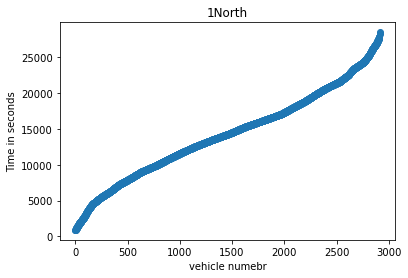

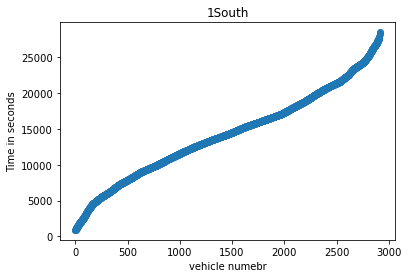

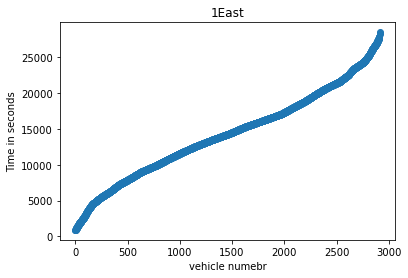

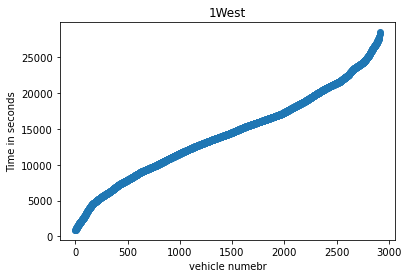

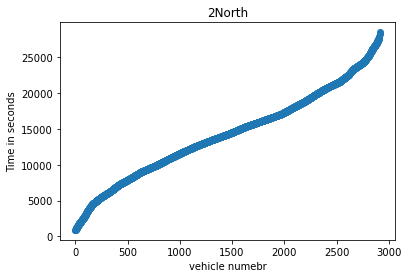

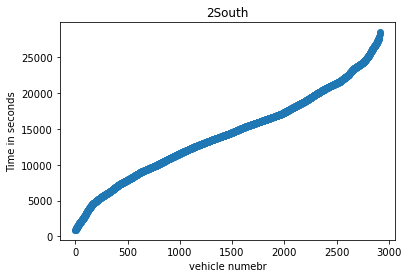

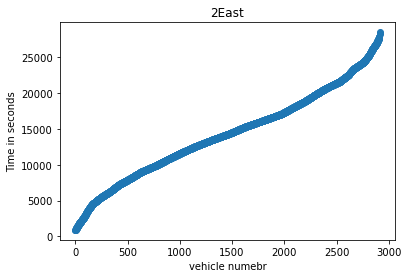

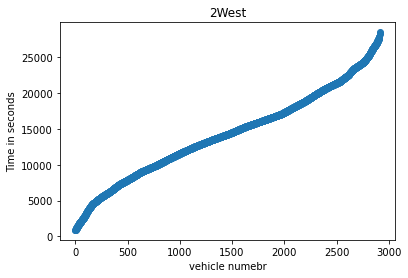

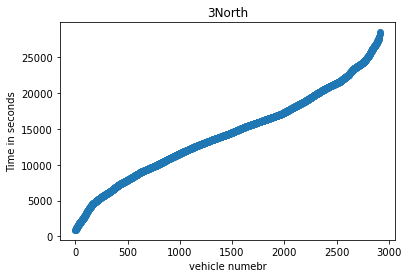

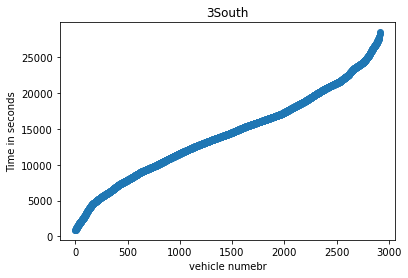

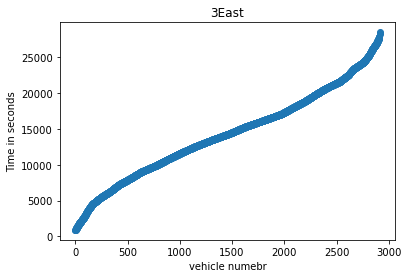

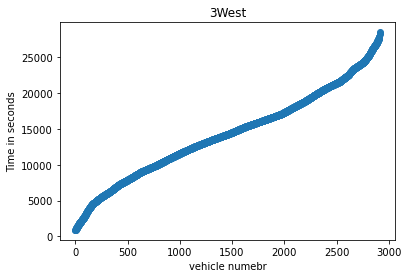

In [173]:
import matplotlib.pyplot as plt
for key in time_index_per_lane:
    y = time_index_per_lane['1North']
    x = np.arange(0,len(y),1)


    fig, ax  = plt.subplots()

    ax.scatter(x,y)
    ax.set_xlabel('vehicle numebr')
    ax.set_ylabel('Time in seconds')
    ax.set_title(key)

2913